## Challenge

Armed with your new skills, go forth and model some data! Find a repeated measures dataset (possibly using the data sources assignment), generate a hypothesis, and test it. 

You should perform the following steps:

1. Before looking at the data, define your hypothesis
2. Visualize the data
3. Check assumptions
4. Calculate ICC
5. Use likelihood ratio tests to choose a random effects structure
6. Check distribution of residuals and adjust model as needed.
7. Finalize your model and interpret the results in light of your hypothesis

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

In [45]:
df =  pd.read_csv('./dataverse_files/MX.csv')

### 1. Before looking at the data, define your hypothesis


**There were more catholic people in 2000 than 2014**

### 2. Visualize the data


In [46]:
df.head(5)

,stateno,urban,electoral_competition,State,PRI_governor,PRD_governor,LGBT_orgs,year,DV,durat,durat2,durat3,diffusion,past_events,levangelicals,lcatholics,lwealth,lracial_diversity
0,1,80.227791,0.342898,Aguascalientes,0,0,0.0,2000,0,1,1,1,0,0,0.486053,4.560621,6.946636,-1.887513
1,1,80.411575,0.342898,Aguascalientes,0,0,0.0,2001,0,2,4,8,0,0,0.591231,4.558076,6.940183,-1.718006
2,1,80.595358,0.342898,Aguascalientes,0,0,0.0,2002,0,3,9,27,0,0,0.686392,4.555526,6.938942,-1.573111
3,1,80.779141,0.342898,Aguascalientes,0,0,0.0,2003,0,4,16,64,0,0,0.773278,4.552969,6.935535,-1.446578
4,1,80.962924,0.342898,Aguascalientes,0,0,0.0,2004,0,5,25,125,0,0,0.853215,4.550405,6.953285,-1.334272


In [47]:
df.describe()

,stateno,urban,electoral_competition,PRI_governor,PRD_governor,LGBT_orgs,year,DV,durat,durat2,durat3,diffusion,past_events,levangelicals,lcatholics,lwealth,lracial_diversity
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,16.500000,74.751628,0.303411,0.575000,0.150000,0.193311,2007.000000,0.183333,8.000000,82.666667,960.00000,1.327083,0.647917,1.746218,4.428063,6.838676,1.049346
std,9.242726,14.178505,0.071904,0.494859,0.357444,0.406151,4.325001,0.689720,4.325001,71.163469,1054.94703,2.379298,1.868036,0.598154,0.114639,0.528273,1.451282
min,1.000000,44.532674,0.177696,0.000000,0.000000,0.000000,2000.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.077820,4.057258,5.792262,-1.895496
25%,8.750000,64.436116,0.250620,0.000000,0.000000,0.000000,2003.000000,0.000000,4.000000,16.000000,64.00000,0.000000,0.000000,1.306993,4.390989,6.499502,-0.046627
50%,16.500000,76.628393,0.287631,1.000000,0.000000,0.000000,2007.000000,0.000000,8.000000,64.000000,512.00000,0.000000,0.000000,1.765053,4.459155,6.795577,0.954213
75%,24.250000,86.255204,0.359197,1.000000,0.000000,0.280640,2011.000000,0.000000,12.000000,144.000000,1728.00000,2.000000,0.000000,2.193069,4.510349,7.085214,2.451949
max,32.000000,99.763865,0.584350,1.000000,1.000000,2.091749,2014.000000,4.000000,15.000000,225.000000,3375.00000,16.000000,13.000000,3.064558,4.568576,9.155768,3.619396


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
stateno                  480 non-null int64
urban                    480 non-null float64
electoral_competition    480 non-null float64
State                    480 non-null object
PRI_governor             480 non-null int64
PRD_governor             480 non-null int64
LGBT_orgs                480 non-null float64
year                     480 non-null int64
DV                       480 non-null int64
durat                    480 non-null int64
durat2                   480 non-null int64
durat3                   480 non-null int64
diffusion                480 non-null int64
past_events              480 non-null int64
levangelicals            480 non-null float64
lcatholics               480 non-null float64
lwealth                  480 non-null float64
lracial_diversity        480 non-null float64
dtypes: float64(7), int64(10), object(1)
memory usage: 67.6+ KB


Text(0.5, 1, 'Correlation Matrix')

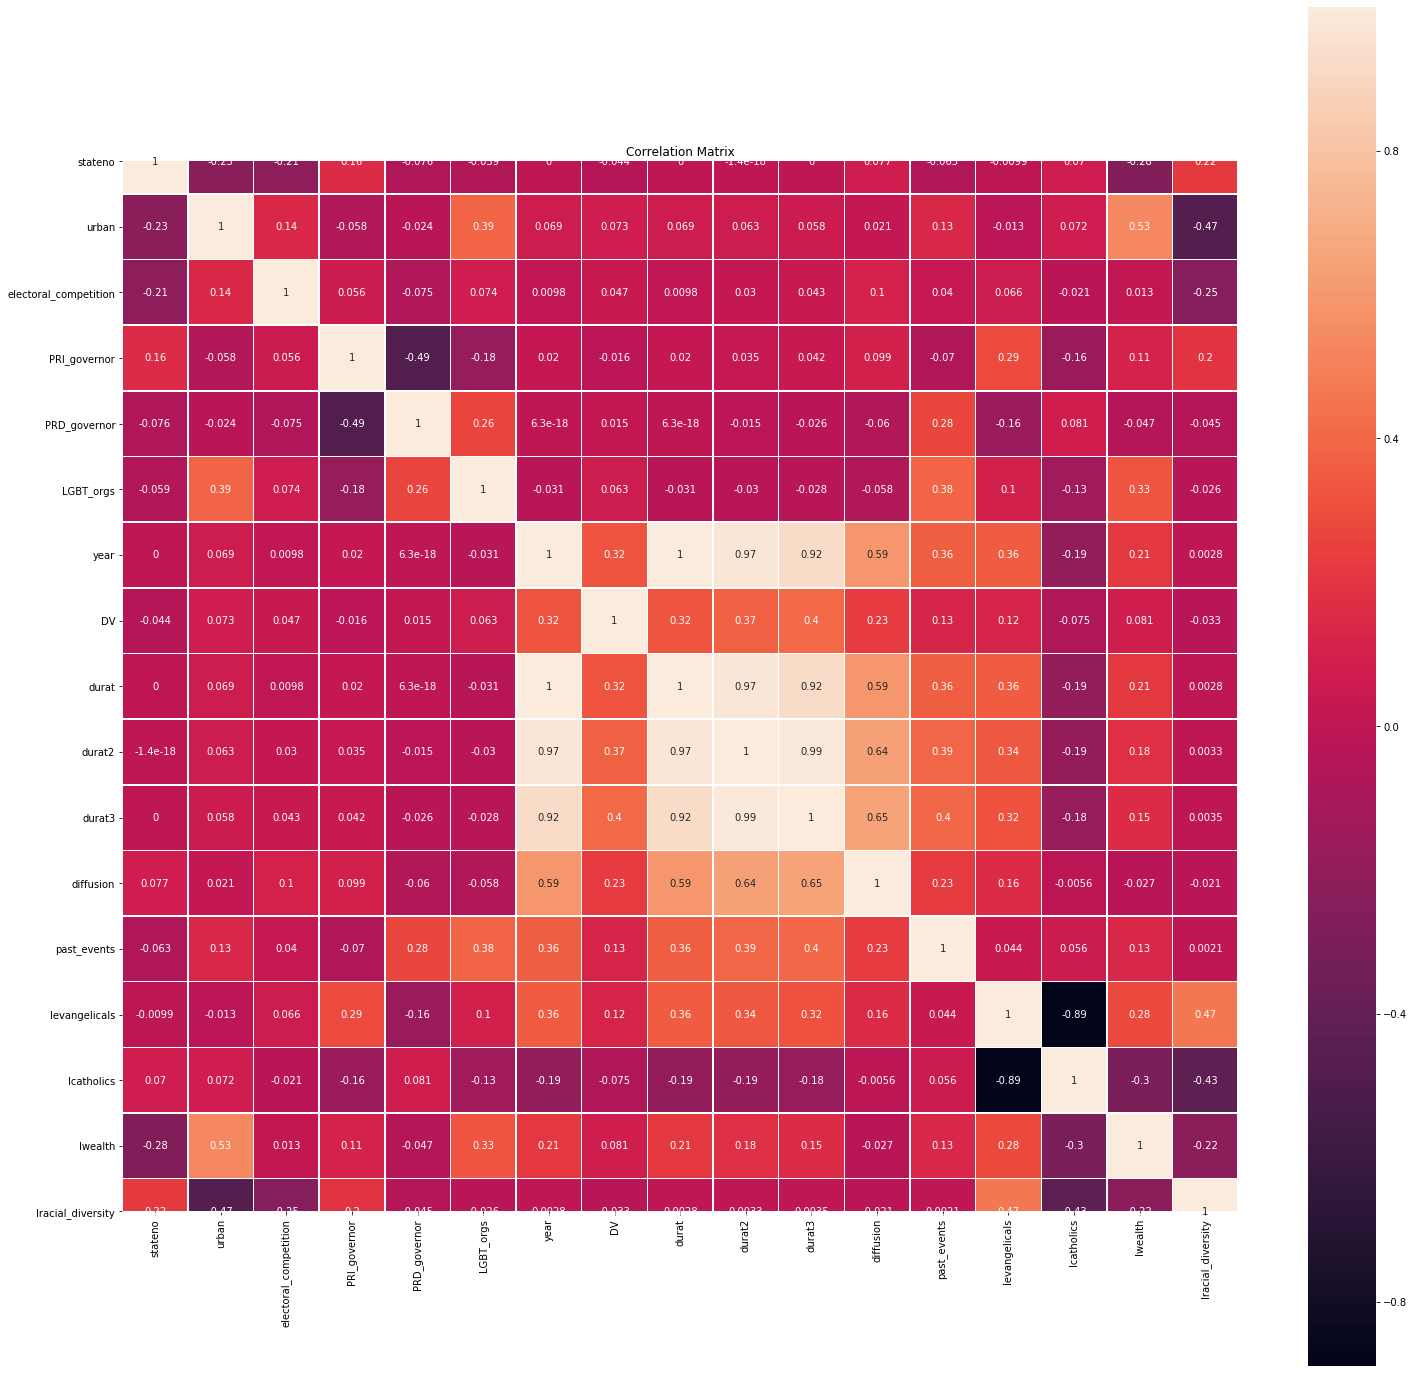

In [49]:
#Check correlation
correlation = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")

No null values in dataset


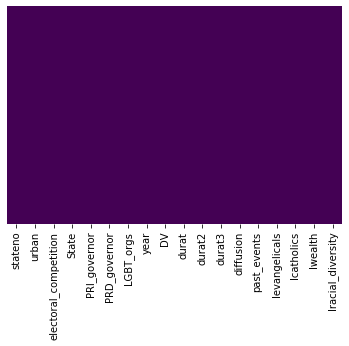

In [50]:
print('No null values in dataset')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

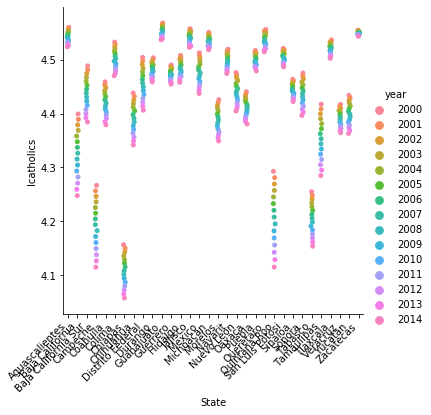

In [51]:
sns.catplot(x='State', y='lcatholics', data=df, hue='year')
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

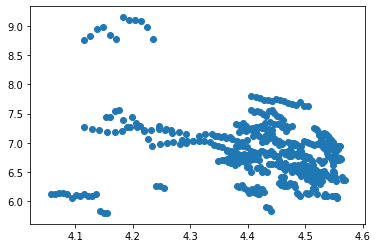

In [52]:
plt.scatter(df['lcatholics'],df['lwealth'])
plt.show()

In [53]:
# lets use the scale function from the preprocess package within sklearn

from sklearn import preprocessing
df["lwealth_scaled"] = preprocessing.scale(df.lwealth.values)



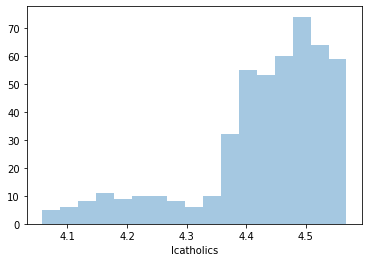

In [54]:
sns.distplot(df.lcatholics, kde=False)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3a77d3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3a77de90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3a68e810>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3a782910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3a782e10>],
 'means': []}

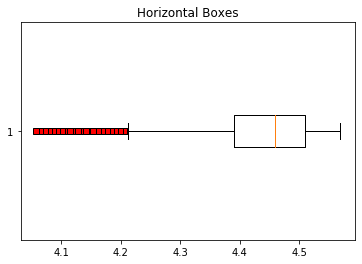

In [55]:
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(df['lcatholics'], vert=False, flierprops=red_square)

In [56]:
df['lcatholics'].describe()

count    480.000000
mean       4.428063
std        0.114639
min        4.057258
25%        4.390989
50%        4.459155
75%        4.510349
max        4.568576
Name: lcatholics, dtype: float64

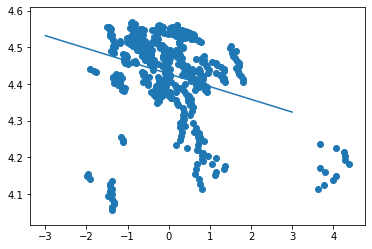

In [57]:
from sklearn.linear_model import LinearRegression


# construct our linear regression model
model = LinearRegression(fit_intercept=True)

x = df.lwealth_scaled
y = df.lcatholics

# fit our model to the data
model.fit(x[:, np.newaxis], y)

# and let's plot what this relationship looks like 
xfit = np.linspace(-3, 3, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [58]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     -0.034719951212942454
Model intercept: 4.4280626568749994


In [59]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(df.lwealth_scaled)
Y = df.lcatholics

results = sm.OLS(Y, X).fit()
results.summary()

/Users/wendy/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lcatholics   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     48.38
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           1.16e-11
Time:                        18:19:00   Log-Likelihood:                 382.21
No. Observations:                 480   AIC:                            -760.4
Df Residuals:                     478   BIC:                            -752.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4281      0.005    887.124      0.000       4.418       4.438
lwealth_scaled    -0.0347      0.005     -6.956      0.000      -0.045      -0.025
==============================================================================
Omnibus:                      144.219   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.887
Skew:                          -1.553   Prob(JB):                     1.16e-73
Kurtosis:                       5.673   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# and let's store the rmse
from math import sqrt
y_predict = model.predict(x.values.reshape(-1,1))
RMSE = sqrt(((y-y_predict)**2).values.mean())

results = pd.DataFrame()
results["Method"] = ["Linear Regression"]
results["RMSE"] = RMSE
results

,Method,RMSE
0,Linear Regression,0.10913


<Figure size 2160x2160 with 0 Axes>

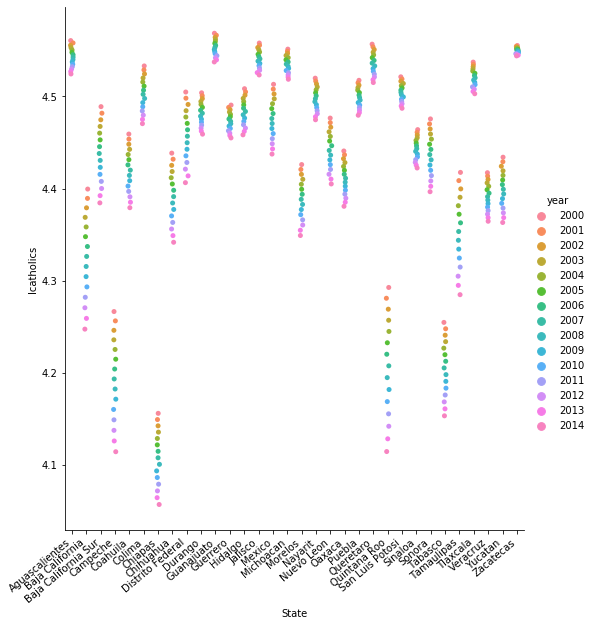

In [61]:
plt.figure(figsize=(30,30))
sns.catplot(x="State", y="lcatholics", data=df, hue='year', height=8, aspect=.9)
plt.setp(plt.gca().get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()



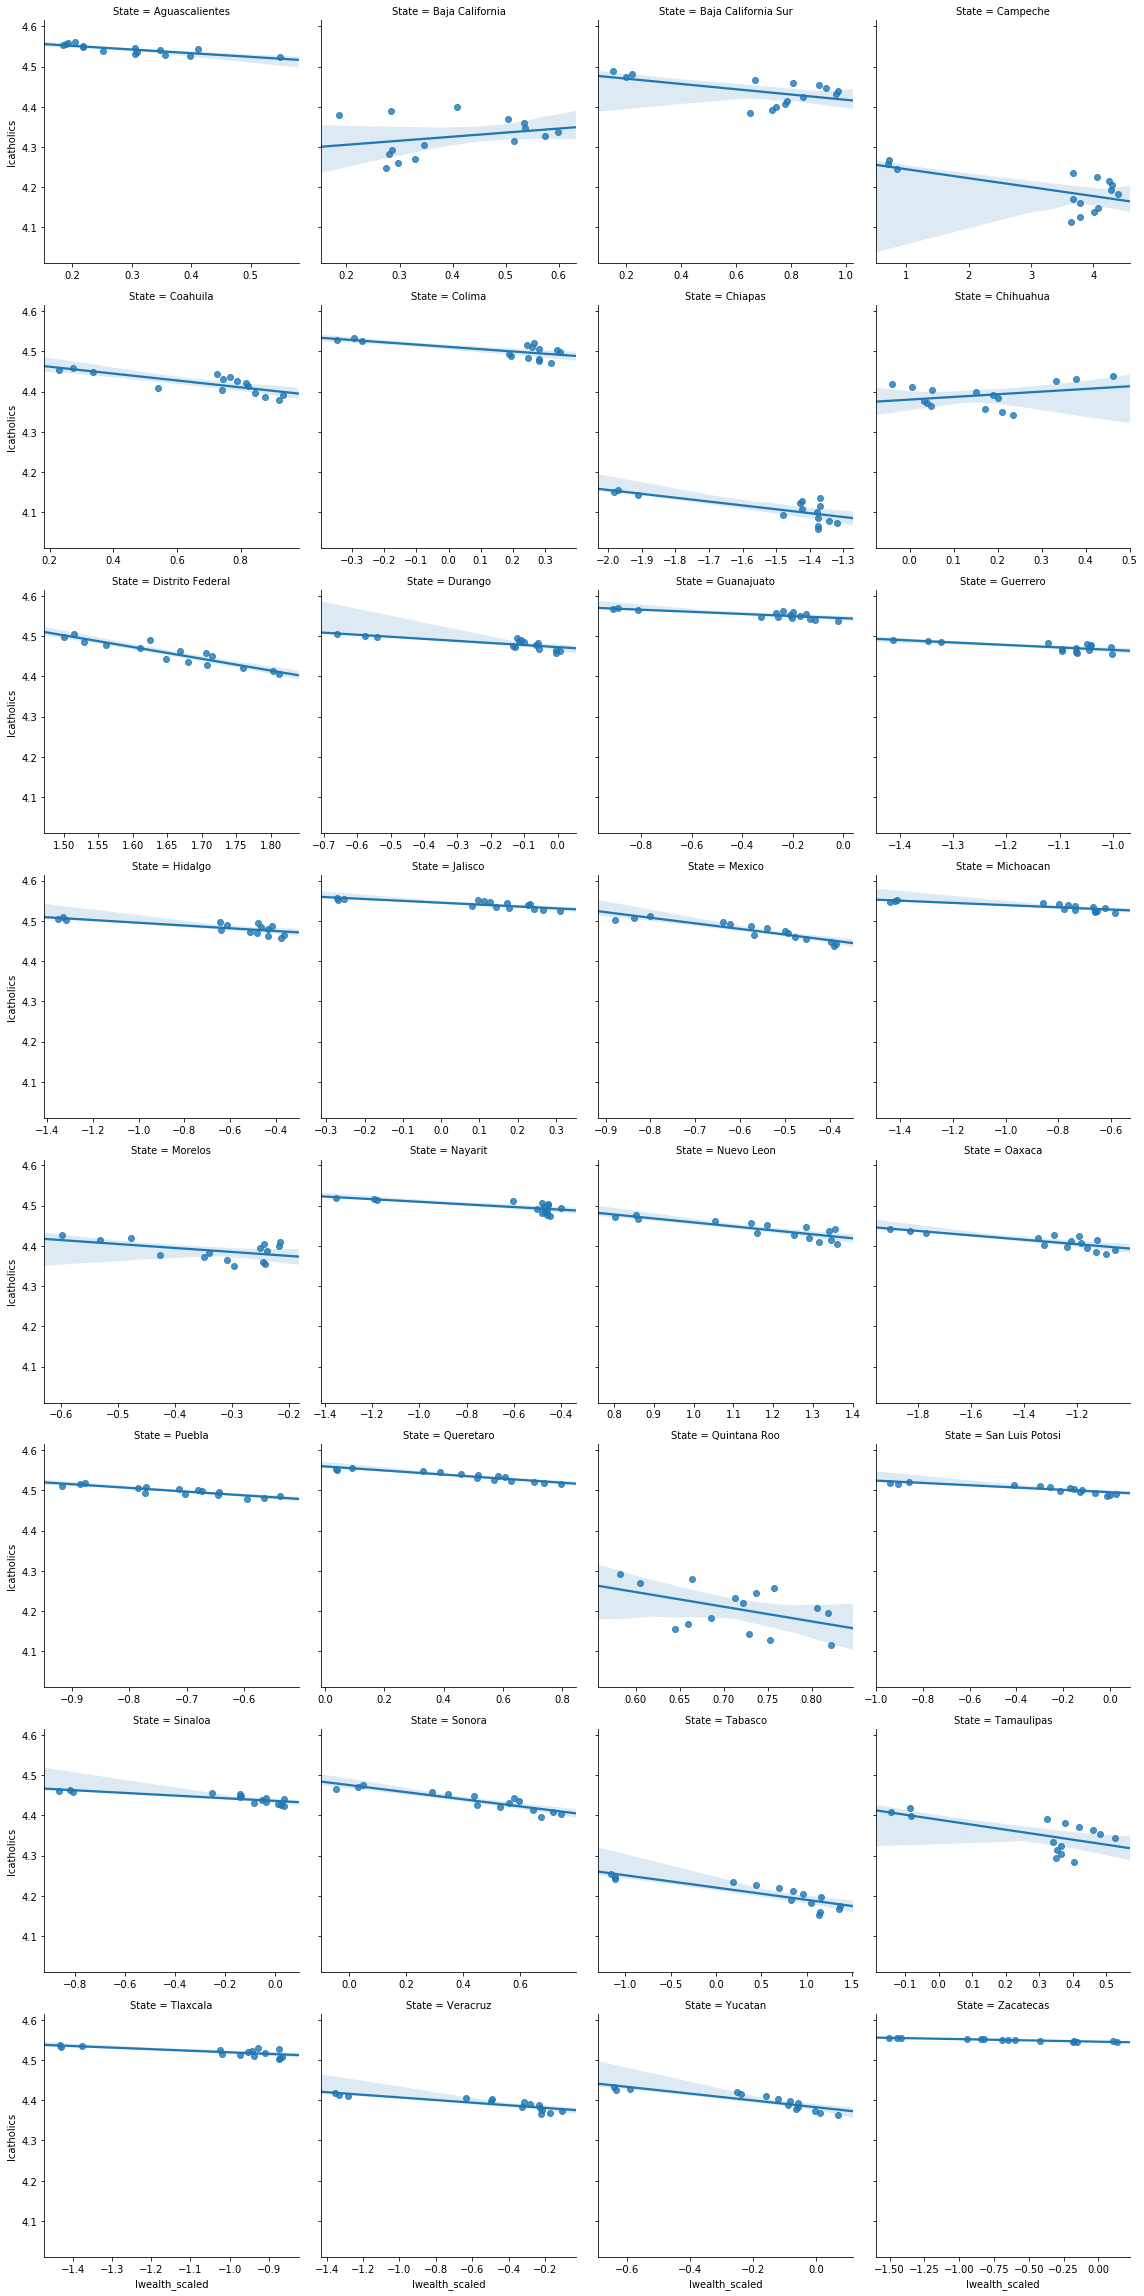

In [62]:
#Separate Linear Regression
grid = sns.lmplot(x = "lwealth_scaled", y = "lcatholics", 
                  col = "State", sharex=False, col_wrap = 4, data = df, height=4)

In [63]:
#Random intercept of each State

import statsmodels.api as sm
import statsmodels.formula.api as smf

# construct our model, with State now shown as a group
md = smf.mixedlm("lcatholics ~ lwealth_scaled", df, groups=df["State"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: lcatholics
No. Observations:   480     Method:             REML      
No. Groups:         32      Scale:              0.0005    
Min. group size:    15      Likelihood:         1038.8650 
Max. group size:    15      Converged:          Yes       
Mean group size:    15.0                                  
----------------------------------------------------------
               Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       4.428    0.019 230.460 0.000  4.390  4.466
lwealth_scaled -0.034    0.003 -12.108 0.000 -0.039 -0.028
Group Var       0.012    0.138                            



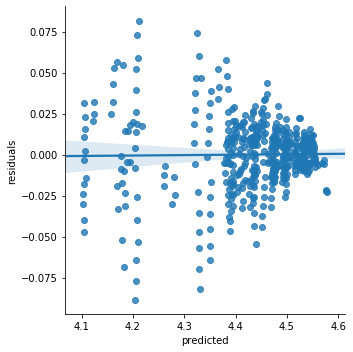

In [64]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["lwealth_scaled"] = df.lwealth_scaled
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

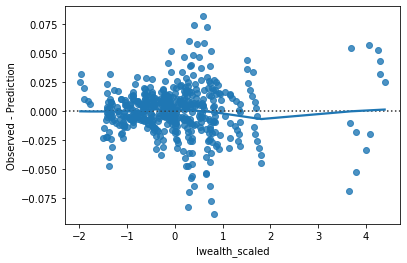

In [65]:
ax = sns.residplot(x = "lwealth_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [66]:
# and let's store the rmse
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).values.mean())
results.loc[2] = ["Mixed", RMSE]
results

,Method,RMSE
0,Linear Regression,0.109130
2,Mixed,0.021742


In [71]:
# construct our model with a random interecept AND a random slope with respect to lwealth_scaled
md = smf.mixedlm("lcatholics ~ lwealth_scaled", df, groups=df["State"], re_formula="~lwealth_scaled")
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     lcatholics
No. Observations:       480         Method:                 REML      
No. Groups:             32          Scale:                  0.0004    
Min. group size:        15          Likelihood:             1050.6304 
Max. group size:        15          Converged:              Yes       
Mean group size:        15.0                                          
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   4.431    0.022 202.592 0.000  4.388  4.474
lwealth_scaled             -0.054    0.008  -6.487 0.000 -0.070 -0.038
Group Var                   0.015    0.205                            
Group x lwealth_scaled Cov -0.000    0.051                            
lwealth_scaled Var     

/Users/wendy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


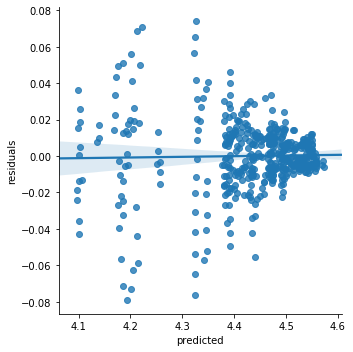

In [72]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["lwealth_scaled"] = df.lwealth_scaled
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

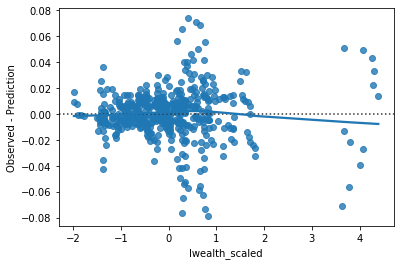

In [73]:
ax = sns.residplot(x = "lwealth_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [74]:
# and let's store the rmse

y_predict_2 = mdf.fittedvalues
RMSE = sqrt(((y-y_predict_2)**2).values.mean())
results.loc[3] = ["Mixed_Random_Slopes", RMSE]
results

,Method,RMSE
0,Linear Regression,0.109130
2,Mixed,0.021742
3,Mixed_Random_Slopes,0.019588


In [172]:

# H0 : data2012 = data2014
# Ha : data2012 != data2014



### 3. Check assumptions

[Reference](https://github.com/mwpnava/thinkful/blob/master/Module%2019%20-%20Assumptions%20of%20Linear%20Regression%20Assignment.ipynb)



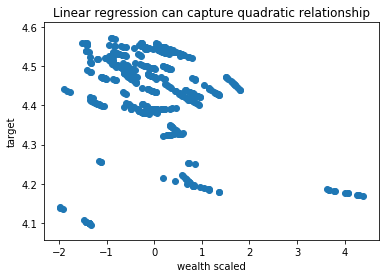

In [75]:
#Assumption 1: Linearity of the model in its coefficients. Features should be linear
# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df['lwealth_scaled'], mdf.fittedvalues)
plt.xlabel("wealth scaled")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()


In [76]:
#Assumption 2: The error term should be zero on average

predictions = mdf.fittedvalues
errors = y - predictions   # equals to: residuals = mdf.resid.values

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: 2.1001718882492546e-15


The average of the model's error is effectively zero.

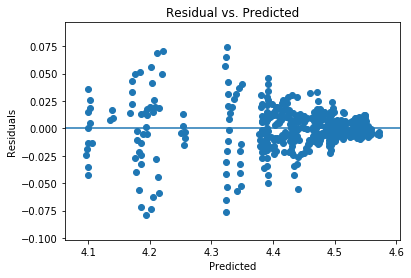

In [77]:
# Assumption 3: homoscedasticity which means that the residuals 
# are normally distributed in relation to the predicted value

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [78]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 1037.52 and p value is 1.26e-227
Levene test statistic value is 318.06 and p value is 1.18e-61


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

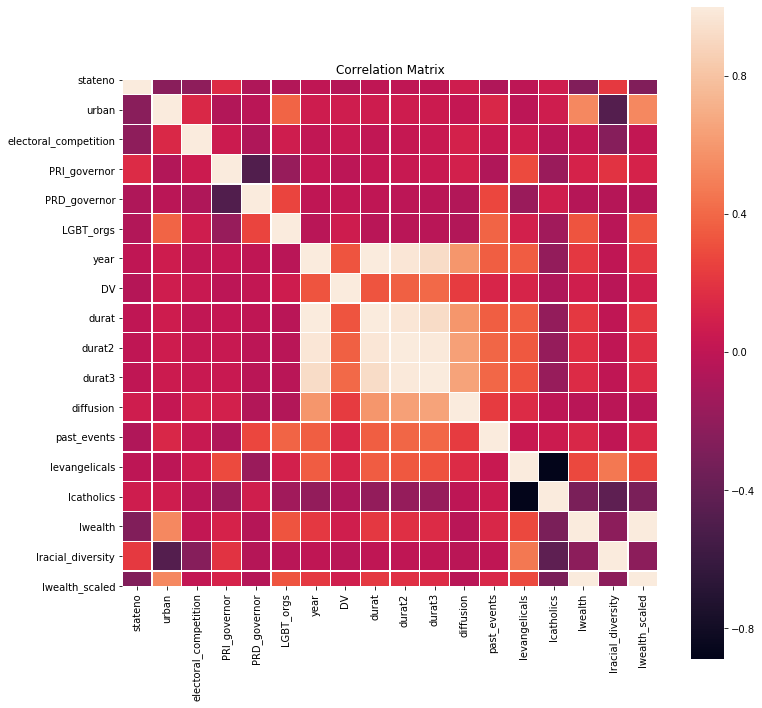

In [79]:
# Assumption 4 : low multicollinearity, Individual features should be only weakly correlated with one another, 
# and ideally completely uncorrelated.

correlation = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation, square=True,  linewidths=.3)
plt.title("Correlation Matrix")
plt.show()


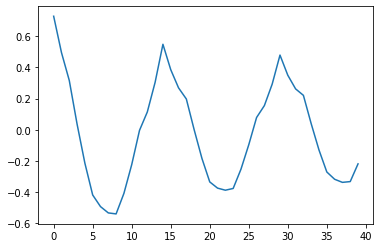

In [80]:
#Assumption 5: Error terms should be uncorrelated with one another

from statsmodels.tsa.stattools import acf

acf_data = acf(errors, fft=True)
plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors of our model is quite high in one limit (ranging between 0.8 and -0.5)

                lwealth_scaled        errors
lwealth_scaled    1.000000e+00  9.744688e-14
errors            9.744688e-14  1.000000e+00


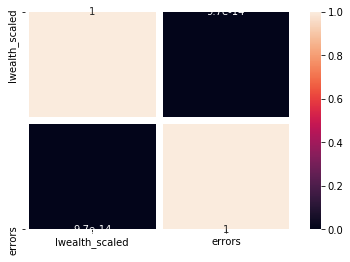

In [96]:
#Assumption 6: Features shouldn't be correlated with the errors

data = df['lwealth_scaled']

exogeneity_df = pd.DataFrame(data) 
exogeneity_df['errors'] = errors

correlation = exogeneity_df.corr()
print(correlation)
sns.heatmap(correlation,  annot=True, linewidths=6)

Feature is not correlated with errors

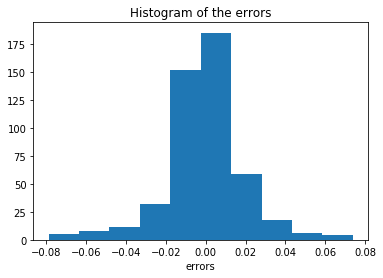

In [82]:
# Assumption 7: Error terms must be normally distributed.

plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")
plt.show()

### 4. Calculate ICC


In [86]:
# The intraclass correlation is commonly used to quantify the degree to which individuals with a 
# fixed degree of relatedness (e.g. full siblings) resemble each other in terms of a quantitative trait

Y_table = pd.DataFrame(df['lwealth_scaled']) 
Y_table['predictions'] = predictions

#Convert a dataframe into a numpy array
Y_table = Y_table.rename_axis('lwealth_scaled').values  

ICC_calculation = ICC_rep_anova(Y_table)
print('ICC Calculation is: {}'.format(ICC_calculation[0]))

ICC Calculation is: -0.0685731971818095


In [85]:
#This implementation is from: https://github.com/nipy/nipype/blob/master/nipype/algorithms/icc.py

from __future__ import (print_function, division, unicode_literals,
                        absolute_import)
from builtins import range
import os
import numpy as np
from numpy import ones, kron, mean, eye, hstack, dot, tile
from numpy.linalg import pinv


def ICC_rep_anova(Y):
    '''
    the data Y are entered as a 'table' ie subjects are in rows and repeated
    measures in columns
    One Sample Repeated measure ANOVA
    Y = XB + E with X = [FaTor / Subjects]
    '''

    [nb_subjects, nb_conditions] = Y.shape
    dfc = nb_conditions - 1
    dfe = (nb_subjects - 1) * dfc
    dfr = nb_subjects - 1

    # Compute the repeated measure effect
    # ------------------------------------

    # Sum Square Total
    mean_Y = mean(Y)
    SST = ((Y - mean_Y)**2).sum()

    # create the design matrix for the different levels
    x = kron(eye(nb_conditions), ones((nb_subjects, 1)))  # sessions
    x0 = tile(eye(nb_subjects), (nb_conditions, 1))  # subjects
    X = hstack([x, x0])

    # Sum Square Error
    predicted_Y = dot(dot(dot(X, pinv(dot(X.T, X))), X.T), Y.flatten('F'))
    residuals = Y.flatten('F') - predicted_Y
    SSE = (residuals**2).sum()

    residuals.shape = Y.shape

    MSE = SSE / dfe

    # Sum square session effect - between colums/sessions
    SSC = ((mean(Y, 0) - mean_Y)**2).sum() * nb_subjects
    MSC = SSC / dfc / nb_subjects

    session_effect_F = MSC / MSE

    # Sum Square subject effect - between rows/subjects
    SSR = SST - SSC - SSE
    MSR = SSR / dfr

    # ICC(3,1) = (mean square subjeT - mean square error) /
    #            (mean square subjeT + (k-1)*-mean square error)
    ICC = (MSR - MSE) / (MSR + dfc * MSE)

    e_var = MSE  # variance of error
    r_var = (MSR - MSE) / nb_conditions  # variance between subjects

    return ICC, r_var, e_var, session_effect_F, dfc, dfe

### 5. Use likelihood ratio tests to choose a random effects structure

In [87]:
#Working on understanding this topic

### 6. Check distribution of residuals and adjust model as needed

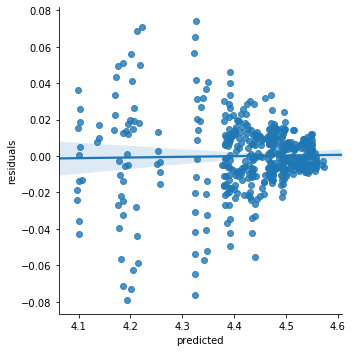

In [88]:
# Plot the residuals distribution
sns.lmplot(x = "predicted", y = "residuals", data = performance)

(array([  4.,   1.,   4.,   4.,   6.,   5.,   9.,  23.,  44., 108.,  83.,
        102.,  45.,  14.,  11.,   7.,   4.,   2.,   1.,   3.]),
 array([-0.0788141 , -0.07118027, -0.06354643, -0.05591259, -0.04827876,
        -0.04064492, -0.03301109, -0.02537725, -0.01774341, -0.01010958,
        -0.00247574,  0.0051581 ,  0.01279193,  0.02042577,  0.0280596 ,
         0.03569344,  0.04332728,  0.05096111,  0.05859495,  0.06622879,
         0.07386262]),
 <a list of 20 Patch objects>)

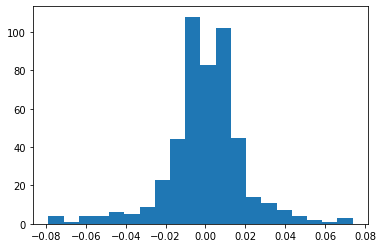

In [89]:
plt.hist(performance['residuals'], bins = 20)

### 7. Finalize your model and interpret the results in light of your hypothesis

T-test=-3.0487465402782106, p-value=0.9988510086469782
There are equal number of catholics in 2000 and 2014


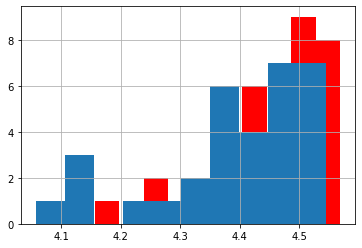

In [98]:

from statsmodels.stats.weightstats import ztest

# Hypothesis: There were more catholic people in 2000 than 2014

# H0 : catholics2000 = catholics2014
# Ha : catholics2000 < catholics2014

#Set data for the country
catholics2000 = df[(df['year']==2000)]['lcatholics']
catholics2014 = df[(df['year']==2014)]['lcatholics']


#Comparing samples
    
#z-test from Statsmodels package with alternate='smaller' 
#as an argument to denote the one-tailed test.

t, p = ztest(catholics2014, value = catholics2000.mean(), alternative = "larger")

print('T-test={}, p-value={}'.format(t, p))

# interpret
alpha = 0.05
if p > alpha:
    print('There are equal number of catholics in 2000 and 2014')
else:
    print('There are less number of catholics in 2000 than in 2014')

    
catholics2000.hist(color='red')
catholics2014.hist()

plt.show()

----------------------------------
By: Wendy Navarrete

November 2019